In [1]:
%load_ext autoreload
%autoreload 2
%env CUDA_VISIBLE_DEVICES=2

# change directory to main folder
%cd ..

env: CUDA_VISIBLE_DEVICES=2
/gpfs01/berens/user/jdoehl/GitHub/sssl


In [2]:
from utils.plotting_utils import *
from torchvision.datasets import CIFAR10, CIFAR100
from utils.data_utils import get_train_and_test_set
cifar10_train, cifar10_test = get_train_and_test_set(CIFAR10)
# cifar100_train, cifar100_test = get_train_and_test_set(CIFAR100)

ckpt_path = "logs/reruns/SimCLR/version_0/checkpoint/epoch=999step=49000.ckpt"

In [ ]:
from lightning_simclr import SimCLR
import torch
import matplotlib as mpl
from utils.plotting_utils import plot_extrem_norm_images_per_class, get_embeddings

cmap = mpl.colormaps['tab10']
paths = {
    #   "SimCLR": ("black", "logs/reruns/SimCLR/version_0/embed_history.npy"),
      "Angle": (cmap(0), "logs/reruns/mappings_onto_hypersphere/angle/version_0/embed_history.npy"),
    #   "Angle \n(second seed)": (cmap(1), "logs/reruns/mappings_onto_hypersphere/angle/version_1/embed_history.npy"),
      "Angle2": (cmap(2), "logs/reruns/mappings_onto_hypersphere/angle2/version_0/embed_history.npy"),
      "Mono": (cmap(3), "logs/reruns/mappings_onto_hypersphere/mono/version_0/embed_history.npy"),
      "Stereo": (cmap(4), "logs/reruns/mappings_onto_hypersphere/stereo/version_0/embed_history.npy"),
      "Exp Map": (cmap(5), "logs/reruns/mappings_onto_hypersphere/exp_map/version_1/embed_history.npy"),
}

def plot_extreme_norm_images_from(paths, high_norm=True):
    for name, (color, path) in paths.items():
        simclr_model = SimCLR.load_from_checkpoint(path.replace("embed_history.npy", "checkpoint/epoch=999step=49000.ckpt"))
        embed_dict = get_embeddings(simclr_model, cifar10_test)
        fig, ax = plot_extrem_norm_images_per_class(embed_dict, n_image_per_class=5, high_norm=high_norm, add_labels=False)
        fig.suptitle(name)
        plt.show()
    
plot_extreme_norm_images_from(paths, high_norm=True)

In [63]:
import numpy as np
npy_path =  "logs/reruns/simclr/version_4/embed_history.npy"

with open(npy_path, 'rb') as f:
    embed_history = np.load(f, allow_pickle=True).item()

embed_history.keys()

dict_keys(['train_norm_history', 'grad_norm_history', 'nomrm_change_history', 'norm_change_batch_history', 'norm_batch_history', 'moved_dist_batch_history'])

Text(0.5, 0.98, 'SimCLR -SCH')

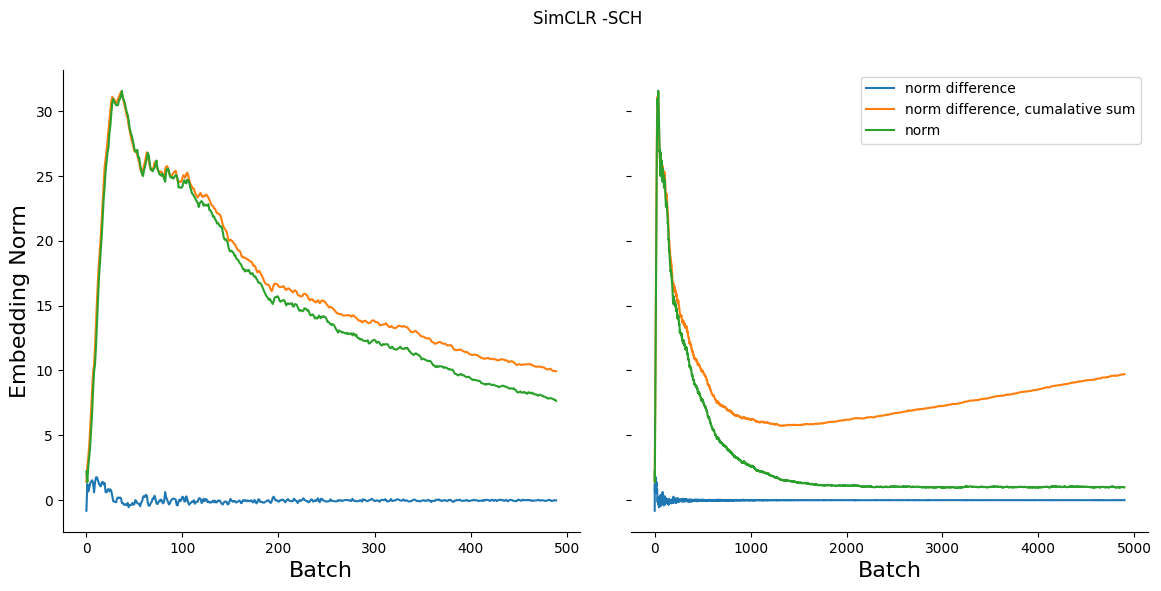

In [64]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig = plt.figure(figsize=(14, 6))
gs = fig.add_gridspec(1,2, hspace=0, wspace=0.1)
ax = gs.subplots(sharey=True)
up_to_batch = 490
ax[0].plot(embed_history["norm_change_batch_history"][:up_to_batch], label="norm difference")
ax[0].plot((embed_history["norm_change_batch_history"].cumsum(axis=0) +embed_history["norm_batch_history"][0])[:up_to_batch], label="norm difference, cumalative sum")
ax[0].plot(embed_history["norm_batch_history"][:up_to_batch], label="norm")
ax[0].set_xlabel("Batch", fontdict={"fontsize":16})
ax[0].set_ylabel("Embedding Norm", fontdict={"fontsize":16})
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)



up_to_batch = -1
ax[1].plot(embed_history["norm_change_batch_history"][:up_to_batch], label="norm difference")
ax[1].plot((embed_history["norm_change_batch_history"].cumsum(axis=0) +embed_history["norm_batch_history"][0])[:up_to_batch], label="norm difference, cumalative sum")
ax[1].plot(embed_history["norm_batch_history"][:up_to_batch], label="norm")
ax[1].set_xlabel("Batch", fontdict={"fontsize":16})
# ax[1].set_ylabel("Embedding Norm", fontdict={"fontsize":16})
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['left'].set_visible(False)

# ax.plot(embed_history["moved_dist_batch_history"])
# ax.plot(embed_history["moved_dist_batch_history"]/embed_history["norm_batch_history"])
ax[1].legend()
#
fig.suptitle("SimCLR -SCH", fontdict={"fontsize":20})

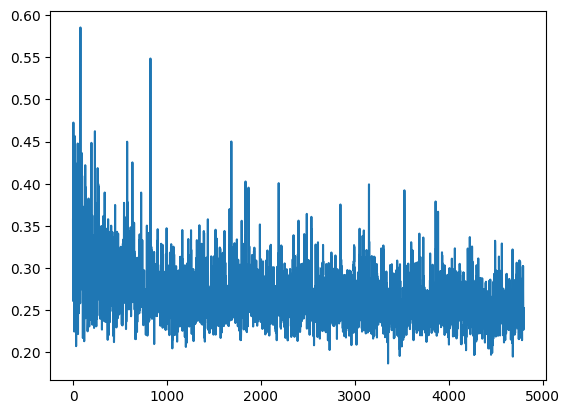

In [65]:
normalized_change = embed_history["norm_change_batch_history"]/embed_history["moved_dist_batch_history"]
# plt.plot(normalized_change[100:])
normalized_movement = embed_history["moved_dist_batch_history"]/embed_history["norm_batch_history"]
plt.plot(normalized_movement[100:])

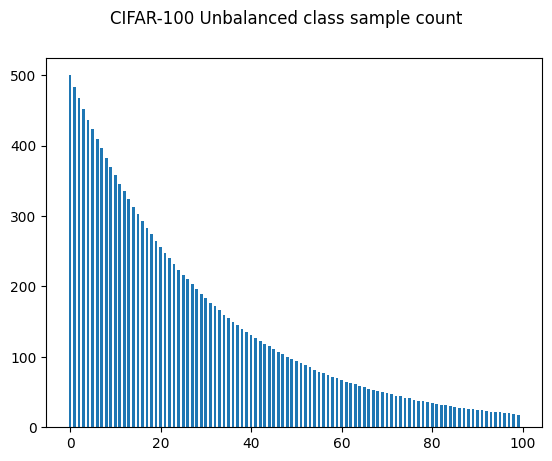

In [57]:
from tbparse import SummaryReader
from matplotlib import pyplot as plt
import matplotlib as mpl
import os
import numpy as np
import torch
n_classes = 100
n_samples = 500
labels = np.linspace(0, n_classes-1, n_classes)
base = 1.034
x = (base ** (-labels) * n_samples).round()
plt.bar(labels,x, width=.6)
# plt.xticks(labels)
plt.suptitle("CIFAR-100 Unbalanced class sample count")
plt.show()

In [27]:
from lightning_simclr import SimCLR
import torch
import matplotlib as mpl

# cmap = mpl.colormaps['tab20']
# paths = {
#     # "2xLR WD/2": (cmap(16), "logs/reruns/lr_weight_decay_rebalance/l2/version_0/embed_history.npy"),
#     # "256xLR WD/256": (cmap(9), "logs/reruns/rebalance_adjusted_head/l2/version_2/embed_history.npy"),
#     # "1024xLR WD/1024": (cmap(10), "logs/reruns/rebalance_adjusted_head/l2/version_3/embed_history.npy"),
#     # "2048xLR WD/2048": (cmap(11), "logs/reruns/rebalance_adjusted_head/l2/version_4/embed_history.npy"),
#     # "4096xLR WD/4096": (cmap(12), "logs/reruns/rebalance_adjusted_head/l2/version_5/embed_history.npy"),
#     # "8192xLR WD/8192": (cmap(13), "logs/reruns/rebalance_adjusted_head/l2/version_6/embed_history.npy"),
#     "32768xLR WD/32768": (cmap(15), "logs/reruns/rebalance_adjusted_head/l2/version_8/embed_history.npy"),
#     "16384xLR WD/16384": (cmap(14), "logs/reruns/rebalance_adjusted_head/l2/version_7/embed_history.npy"),
#     "128xLR WD/128": (cmap(8), "logs/reruns/rebalance_adjusted_head/l2/version_1/embed_history.npy"),
#     "32xLR WD/32": (cmap(7), "logs/reruns/rebalance_adjusted_head/l2/version_0/embed_history.npy"),
#     "8xLR WD/8": (cmap(18), "logs/reruns/lr_weight_decay_rebalance/l2/version_2/embed_history.npy"),
#     "4xLR WD/4": (cmap(17), "logs/reruns/lr_weight_decay_rebalance/l2/version_1/embed_history.npy"),
#     "SimCLR baseline": ("black", "logs/reruns/SimCLR/simclr/embed_history.npy"),
#     "LR/2 2xWD": (cmap(0), "logs/reruns/rebalance_lower_lr_wd/l2/version_0/embed_history.npy"),
#     "LR/4 4xWD": (cmap(1), "logs/reruns/rebalance_lower_lr_wd/l2/version_1/embed_history.npy"),
#     "LR/8 8xWD": (cmap(2), "logs/reruns/rebalance_lower_lr_wd/l2/version_2/embed_history.npy"),
#     "LR/32 32xWD": (cmap(3), "logs/reruns/rebalance_lower_lr_wd/l2/version_3/embed_history.npy"),
#     "LR/64 64xWD": (cmap(4), "logs/reruns/rebalance_lower_lr_wd/l2/version_4/embed_history.npy"),
#     "LR/128 128xWD": (cmap(5), "logs/reruns/rebalance_lower_lr_wd/l2/version_5/embed_history.npy"),
#     "LR/256 256xWD": (cmap(6), "logs/reruns/rebalance_lower_lr_wd/l2/version_6/embed_history.npy"),
# }

# cmap = mpl.colormaps['tab20c']
# paths = {
#     "Cifar-10 Unbalanced": (cmap(8), "logs/reruns/simclr/cifar-10_unbalanced/version_5/embed_history.npy"),
    
#     "SimCLR": ("black", "logs/reruns/SimCLR/simclr/embed_history.npy"),
#     "-SCH -WD -M": (cmap(16), "logs/reruns/simclr_without_everything/version_0/embed_history.npy"),

#     "+SH": (cmap(0), "logs/reruns/shuffle/shuffled_positve_pairs/version_7/embed_history.npy"),
#     "+SH\n-SCH -WD -M": (cmap(1), "logs/reruns/shuffle/shuffled_positve_pairs/version_12/embed_history.npy"),

#     # "+SH +N": (cmap(4), "logs/reruns/shuffle/shuffled_positve_pairs+higher_noise/version_2/embed_history.npy"),
#     # "+SH +N \n-SCH -WD -M ": (cmap(5), "logs/reruns/shuffled_positve_pairs+higher_noise/version_1/embed_history.npy"),

#     "+N": (cmap(4), "logs/reruns/+N/version_0/embed_history.npy"),
#     "+N \n-SCH -WD -M ": (cmap(5), "logs/reruns/+N-M-SCH-WD/version_0/embed_history.npy"),

# }



def print_weight_l2_norm(paths):
    for label, (color, path) in paths.items():
        
        ckpt_path = path.replace("embed_history.npy", "checkpoint/epoch=99.ckpt")
        simclr_model = SimCLR.load_from_checkpoint(ckpt_path)
        model = simclr_model.model

        squard_weight_sum = 0
        for param in model.parameters():
            squard_weight_sum += torch.sum(param**2)
        
        print(f"[{label}],[{torch.sqrt(squard_weight_sum).item():.2f}],")
print_weight_l2_norm(paths)

[Cifar-10],[16.63],
[Cifar-10 Unbalanced],[47.80],
[Cifar-100],[15.95],
[Cifar-100 Unbalanced],[47.76],
[Cifar-10 +SH],[5.82],


In [ ]:
ckpt_path = "logs/reruns/SimCLR/version_0/checkpoint/epoch=999step=49000.ckpt"
ckpt_path = "logs/reruns/simclr-cifar-10_unbalanced/version_0/checkpoint/epoch=329step=4950.ckpt"

# Init: L2 norm of model weights: 113.53378295898438
# 1000 epoch: L2 norm of model weights: 15.095205307006836
# Unbalanced 330 epoch: L2 norm of model weights: 18.107561111450195

# simclr_model = SimCLR("cifar10")
simclr_model = SimCLR.load_from_checkpoint(ckpt_path)
model = simclr_model.model

squard_weight_sum = 0
for param in model.parameters():
    squard_weight_sum += torch.sum(param**2)

print("L2 norm of model weights:", torch.sqrt(squard_weight_sum).item())

L2 norm of model weights: 18.107561111450195


In [3]:
from lightning_simclr import SimCLR
ckpt_path = "logs/reruns/2d_embed_space/version_1/checkpoint/epoch=99step=4900.ckpt"
ckpt_path = "logs/reruns/mapping_variants_2d/exp_map/version_1/checkpoint/epoch=99step=4900.ckpt"

simclr_model = SimCLR.load_from_checkpoint(ckpt_path)

X,y,Z = simclr_model.embed_dataset(cifar10_test)

In [6]:
np.concat([Z, np.zeros((Z.shape[0],1))], axis=-1)

array([[ 0.30095536,  0.        ],
       [-1.48228598,  0.        ],
       [-1.71884274,  0.        ],
       ...,
       [ 1.15482092,  0.        ],
       [ 0.87377918,  0.        ],
       [ 1.56954861,  0.        ]], shape=(10000, 2))

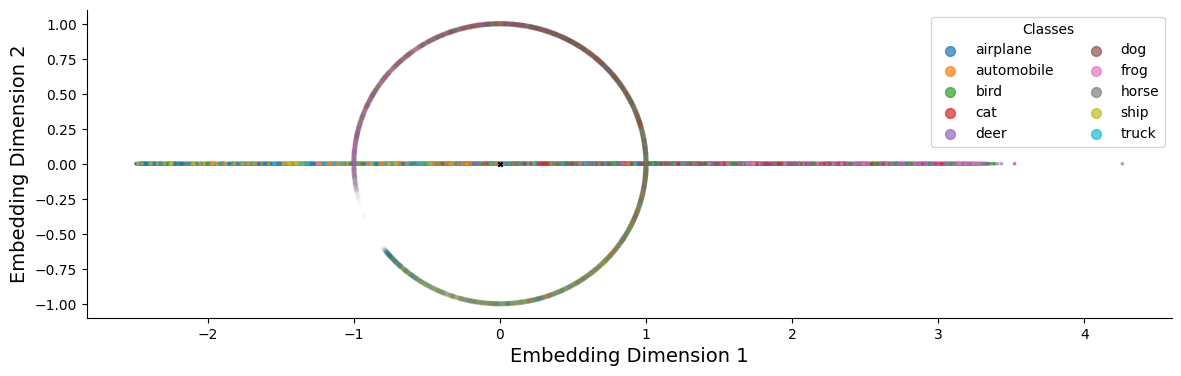

In [ ]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np

# Assuming Z and y are defined and contain your data and class labels
# Z is your 2D embedding array

# --- Class names ---
class_names = cifar10_test.classes #['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
unique_classes = np.arange(len(class_names)) 

fig, ax = plt.subplots(figsize=(14,4))
cmap = mpl.colormaps['tab10']

Z_norm = simclr_model.norm_function(torch.tensor(Z, dtype=torch.float32)).numpy()

# --- Plotting the Data (Existing Code) ---

# Original scatter plot: Z
# We need to map y's integer values to colors correctly for both the scatter and the legend.
colors_y = np.array([cmap(i) for i in y]) 
Z_ = np.concat([Z, -np.ones((Z.shape[0],1))], axis=-1)
ax.scatter(Z_[:,0], Z_[:,1], marker='o', c=colors_y, alpha=0.5, s=3)

# Normalized scatter plot: Z_norm
ax.scatter(Z_norm[:,0], Z_norm[:,1], marker='o', c=colors_y, alpha=.03, s=8) 

# Center 'x'
ax.scatter([0], [0], marker='x', color="black", s=10, zorder=2) 

# --- Create Legend Handles ---
# We iterate through the unique class indices (0-9), get the corresponding color and class name,
# and plot a dummy point for the legend.
legend_handles = []
for i in unique_classes:
    # Get the color for the current class index 'i'
    class_color = cmap(i)
    # Get the name for the current class index 'i'
    class_label = class_names[i]
    
    # Plot a dummy scatter point (handle) for the legend
    # We use a marker size and alpha that looks good in the legend, and don't plot any data.
    handle = ax.scatter([], [], marker='o', color=class_color, alpha=0.7, s=50, label=class_label)
    legend_handles.append(handle)

# --- Add the Legend ---
ax.legend(handles=legend_handles, title="Classes", loc='best', ncol=2, fontsize=10) # Adjust loc and ncol as needed

# --- Customizing the Plot (Existing Code) ---
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Embedding Dimension 1", fontsize=14)
ax.set_ylabel("Embedding Dimension 2", fontsize=14)

plt.show()

In [5]:
path = "logs/reruns/SimCLR/version_0/checkpoint/epoch=999.ckpt"
embed_dict_simclr = get_embeds_for_ckpt(path, cifar10_train)

In [23]:
path = "logs/reruns/SimCLR-cifar100/version_0/checkpoint/epoch=999step=49000.ckpt"
embed_dict_simclr_cifar_100 = get_embeds_for_ckpt(path, cifar100_train)

In [39]:
from lightning_simclr import SimCLR
path = "logs/reruns/SimCLR/version_0/checkpoint/epoch=999.ckpt"
simclr_model = SimCLR.load_from_checkpoint(path)

knn_acc = simclr_model.get_knn_acc_on_dataset(cifar10_train, cifar10_test)
knn_acc

0.9086

In [40]:
simclr_model.get_knn_acc_on_dataset(cifar10_train, cifar10_test)

0.9086

In [24]:
def compute_cos_sim_matrix(embeds):
    norm_embeds = embeds / np.linalg.norm(embeds, axis=1, keepdims=True)
    cos_sims = norm_embeds @ norm_embeds.T
    return cos_sims

In [33]:
from lightning_simclr import ResNet18withProjector
resnet = ResNet18withProjector("cifar10")

In [25]:
cifar100_cos_sims = compute_cos_sim_matrix(embed_dict_simclr_cifar_100["backbone"])

In [35]:
embed_dict_simclr_cifar_100_test = get_embeds_for_ckpt(path, cifar100_test)
cifar100_cos_sims_test = compute_cos_sim_matrix(embed_dict_simclr_cifar_100_test["backbone"])

In [36]:
cifar100_cos_sims_test.min(), cifar100_cos_sims_test.max(), cifar100_cos_sims_test.mean()

(np.float32(0.0037258563), np.float32(1.0000007), np.float32(0.15499832))

In [37]:
cifar100_cos_sims.min(), cifar100_cos_sims.max(), cifar100_cos_sims.mean()

(np.float32(0.0034667503), np.float32(1.0000007), np.float32(0.15361117))

In [10]:
h = embed_dict_simclr["backbone"]
h_norm = h / np.linalg.norm(h, axis=1, keepdims=True)
cos_sims = h_norm @ h_norm.T

In [27]:
cos_sims.min(), cos_sims.max(), cos_sims.mean()

(np.float32(0.0057811947), np.float32(1.0000006), np.float32(0.15937047))

In [32]:
h_norm.min(), h_norm.max()

(np.float32(0.0), np.float32(0.6922046))

In [17]:
z = embed_dict_simclr["projector"]
z_norm = z / np.linalg.norm(z, axis=1, keepdims=True)
z_cos_sims = z_norm @ z_norm.T

In [20]:
z_cos_sims.min(), z_cos_sims.max()

(np.float32(-0.8357985), np.float32(1.0000007))

In [ ]:
path = "logs/Balanced-1000/stereo/version_0/checkpoint/epoch=999.ckpt"
# embed_dict_stereo = get_embeds_for_ckpt(path, cifar10_train)

In [ ]:
path = "logs/reruns/mappings_onto_hypersphere/angle/version_0/checkpoint/epoch=999.ckpt"
embed_dict_angle = get_embeds_for_ckpt(path, cifar10_train)

In [57]:
path = "logs/reruns/mappings_onto_hypersphere/angle2/version_0/checkpoint/epoch=999.ckpt"
embed_dict_anlge2 = get_embeds_for_ckpt(path, cifar10_train)

In [ ]:
fig, ax = plot_extrem_norm_images_per_class(embed_dict_anlge2, high_norm=True)
fig.suptitle("Angle2 - High Norm", fontsize=16)
plt.show()

In [27]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Define the colors and their positions (0 to 1)
# 0.0: black, 0.5: green, 1.0: light blue
colors = [(0, 0, 0),    # Black
          (0,0, 1)] # Light blue (adjust RGB values as needed for desired lightness)

nodes = [0.0, 1.0]

# Create the LinearSegmentedColormap
bb_cmap = mcolors.LinearSegmentedColormap.from_list("BlackBlue", list(zip(nodes, colors)), N=6)
br_cmap = mcolors.LinearSegmentedColormap.from_list("BlackRed", list(zip(nodes, [(0,0,0),(1,0,0) ])), N=10)

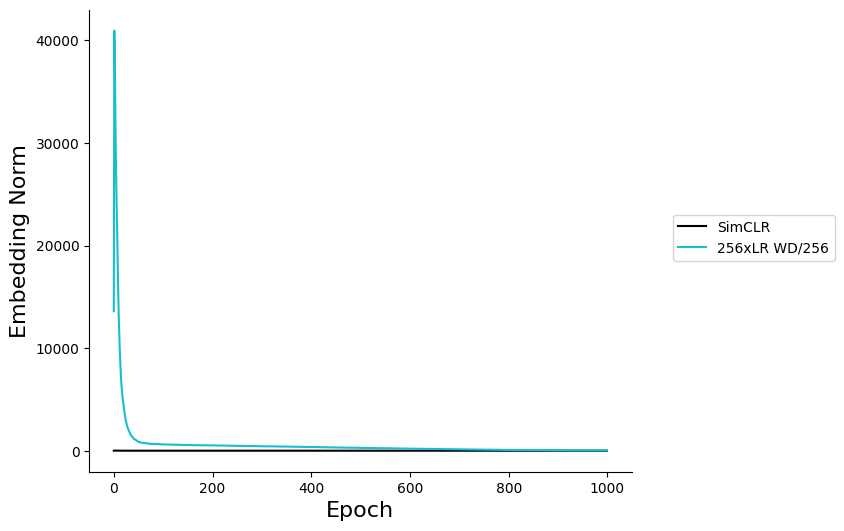

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from typing import Literal


def _plot_history(
        ax,
        embed_history,
        variant_name,
        color,
        from_epoch = 0,
        up_to_epoch = -1,
        only_mean = True,
        show_extremes = False
        ):

    history = embed_history[from_epoch:up_to_epoch]

    if len(history.shape) == 2:
        mean_values = history.mean(1)
    if len(history.shape) == 3:
        mean_values = history.mean((1,2))
    epochs = np.array(list(range(from_epoch, from_epoch+len(history))))
    # if "Unbal" in variant_name:
    #     epochs = epochs // 3.3
    ax.plot(epochs, mean_values, label=variant_name, color=color, alpha=1)

    if not only_mean:
        
        if len(history.shape) == 2:
            std_values = history.std(1)
        if len(history.shape) == 3:
            std_values = history.std((1,2))
        
        ax.fill_between(epochs, mean_values + std_values, mean_values-std_values, alpha=0.15, color=color)

    if show_extremes:
        min_values = history.min(1)
        max_values = history.max(1)
        ax.plot(epochs, max_values, label="max norm")
        ax.plot(epochs, min_values, label="min norm")


def plot_histories(
        paths,
        metric_name: Literal["distance", "norm"] = "norm",
        from_epoch = 0,
        up_to_epoch = -1,
        only_mean = True, 
        ax = None,
        fig = None
        ):
    if fig is None or ax is None:
        fig = plt.figure(figsize=(7, 6))
        gs = fig.add_gridspec(1,1, hspace=0)
        ax = gs.subplots()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
    
    for variant_name, variant in paths.items():
        if type(variant) is tuple:
            variant_color, variant_path = variant
        else:
            variant_path = variant
            variant_color = None
        with open(variant_path, "rb") as f:
            embed_hist = np.load(f, allow_pickle=True).item()
        
        
        history_type = dict(
            norm = "norm_history" if "norm_history" in embed_hist else "train_norm_history",
            distance = "distance_history" # this is angular distance
        )[metric_name]

        _plot_history(
            ax,
            embed_hist[history_type],
            variant_name,
            color=variant_color,
            from_epoch = from_epoch,
            up_to_epoch = up_to_epoch,
            only_mean=only_mean
            )
    
    metric_alias = dict(
        norm = "Embedding Norm",
        distance = "Angular Distance"
    )[metric_name]

    ax.set_ylabel(metric_alias, fontdict={"size":16})
    ax.set_xlabel("Epoch", fontdict={"size":16})

    # Add the first x-value if it's not already included
    
    # ax.set_ylim(0,20)
    return fig, ax
    

# cmap = mpl.colormaps['tab10']

# paths = dict(
#     SimCLR = ("black", "logs/reruns/SimCLR/version_0/embed_history.npy"),
#     # mono = (cmap(5), "logs/Point_tracking-1000/mono/version_2/embed_history.npy"),
#     # stereo = (cmap(6), "logs/Point_tracking-1000/stereo/version_0/embed_history.npy"),
#     # exp_map = (cmap(7), "logs/Point_tracking-1000/exp_map/version_0/embed_history.npy"),
#     # gradscale = (cmap(6), "logs/Point_tracking-1000/gradscale/version_46/embed_history.npy"),
#     # inv_gradscale = (cmap(7), "logs/Point_tracking-1000/inv_gradscale/version_3/embed_history.npy"),
#     # halve_lr = (cmap(5), "logs/No_schedule-_No_decay-1000/l2/version_2/embed_history.npy"),
#     # double_lr = (cmap(8), "logs/No_schedule-_No_decay-1000/double_lr/version_1/embed_history.npy"),
#     # no_decay_double_lr = (cmap(8), "logs/No_schedule-_No_decay-1000/no_decay_double_lr/version_1/embed_history.npy"),
#     # double_decay_double_lr = (cmap(10), "logs/No_schedule-_No_decay-1000/double_decay_double_lr/version_0/embed_history.npy")
# )

# cmap = mpl.colormaps['tab10']
# paths = {
#       "SimCLR": ("black", "logs/reruns/SimCLR/version_0/embed_history.npy"),
#       "Angle": (cmap(0), "logs/reruns/mappings_onto_hypersphere/angle/version_0/embed_history.npy"),
#       "Angle \n(second seed)": (cmap(1), "logs/reruns/mappings_onto_hypersphere/angle/version_1/embed_history.npy"),
#       "Angle2": (cmap(2), "logs/reruns/mappings_onto_hypersphere/angle2/version_0/embed_history.npy"),
#       "Mono": (cmap(3), "logs/reruns/mappings_onto_hypersphere/mono/version_0/embed_history.npy"),
#       "Stereo": (cmap(4), "logs/reruns/mappings_onto_hypersphere/stereo/version_0/embed_history.npy"),
#       "Exp Map": (cmap(5), "logs/reruns/mappings_onto_hypersphere/exp_map/version_1/embed_history.npy"),
# }


cmap = mpl.colormaps['tab10']
paths = {
    "-WD" : (cmap(0), "logs/reruns/non_mapping_variants/no_decay/version_0/embed_history.npy"),
    "-M" : (cmap(1), "logs/reruns/non_mapping_variants/no_momentum/version_0/embed_history.npy"),
    "-SCH" : (cmap(2), "logs/reruns/non_mapping_variants/no_schedule/version_0/embed_history.npy"),
    "SimCLR" : ("black", "logs/reruns/SimCLR/version_0/embed_history.npy"),
    "-WD -M" : (cmap(3), "logs/reruns/non_mapping_variants/no_decay_no_momentum/version_1/embed_history.npy"),
    "-WD -SCH" : (cmap(4), "logs/reruns/no_decay_no_schedule/version_0/embed_history.npy"),
    "-WD -SCH -M" : (cmap(5), "logs/reruns/no_decay_no_schedule_no_momentum/version_0/embed_history.npy"),
}

# cmap = mpl.colormaps['tab20c']
# paths = {
#     "1xLR | 1/4xWD": (cmap(3), "logs/reruns/decay_ablation_no_schedule/l2/version_6/embed_history.npy"),
#     "1xLR": (cmap(0), "logs/reruns/decay_ablation_no_schedule/l2/version_4/embed_history.npy"),
#     "1xLR | 4xWD": (cmap(1), "logs/reruns/decay_ablation_no_schedule/l2/version_2/embed_history.npy"),
#     "1xLR | 16xWD": (cmap(2), "logs/reruns/decay_ablation_no_schedule/l2/version_12/embed_history.npy"),

#     # "2xLR 1/4xWD": (cmap(7), "logs/reruns/decay_ablation_no_schedule/l2/version_11/embed_history.npy"),
#     "2xLR": (cmap(4), "logs/reruns/decay_ablation_no_schedule/l2/version_9/embed_history.npy"),
#     "2xLR | 4xWD": (cmap(5), "logs/reruns/decay_ablation_no_schedule/l2/version_7/embed_history.npy"),
#     "2xLR | 16xWD": (cmap(6), "logs/reruns/decay_ablation_no_schedule/l2/version_14/embed_history.npy"),
    
#     "4xLR | 1/4xWD": (cmap(11), "logs/reruns/decay_ablation_no_schedule/l2/version_20/embed_history.npy"),
#     "4xLR": (cmap(8), "logs/reruns/decay_ablation_no_schedule/l2/version_18/embed_history.npy"),
#     "4xLR | 4xWD": (cmap(9), "logs/reruns/decay_ablation_no_schedule/l2/version_16/embed_history.npy"),
# }
# cmap = mpl.colormaps['tab20']
# paths = {
#       "SimCLR": ("black", "logs/reruns/SimCLR/version_0/embed_history.npy"),
#       "Cut (c=3)": (cmap(16), "logs/reruns/andrews_variants/cut/version_0/embed_history.npy"),
#       "Gradscale": (cmap(12), "logs/reruns/andrews_variants/gradscale/version_0/embed_history.npy"),
# }


# cmap = mpl.colormaps['tab20c']
# paths = {
#     "1xLR": (cmap(0), "logs/reruns/decay_ablation_no_schedule/l2/version_4/embed_history.npy"),

#     # "2xLR 1/4xWD": (cmap(7), "logs/reruns/decay_ablation_no_schedule/l2/version_11/embed_history.npy"),
#     "2xLR | 1/2xWD": (cmap(4), "logs/reruns/decay_ablation_no_schedule/l2/version_10/embed_history.npy"),
#     # "2xLR | 4xWD": (cmap(5), "logs/reruns/decay_ablation_no_schedule/l2/version_7/embed_history.npy"),
#     # "2xLR | 16xWD": (cmap(6), "logs/reruns/decay_ablation_no_schedule/l2/version_14/embed_history.npy"),
    
#     "4xLR | 1/4xWD": (cmap(8), "logs/reruns/decay_ablation_no_schedule/l2/version_20/embed_history.npy"),
#     # "4xLR": (cmap(8), "logs/reruns/decay_ablation_no_schedule/l2/version_18/embed_history.npy"),
#     # "4xLR | 4xWD": (cmap(9), "logs/reruns/decay_ablation_no_schedule/l2/version_16/embed_history.npy"),
# }


# cmap = mpl.colormaps['tab10']
# paths = {
#     "SimCLR" : ("black", "logs/reruns/SimCLR/simclr/embed_history.npy"),
#     "Mapped gradients" : (cmap(0), "logs/reruns/const_norm/version_10/embed_history.npy"),
#     # "Mapped gradients -WD" : (cmap(1), "logs/reruns/const_norm/version_9/embed_history.npy"),
# }


# cmap = mpl.colormaps['tab20']
# paths = {
#     "32768xLR WD/32768": (cmap(15), "logs/reruns/rebalance_adjusted_head/l2/version_8/embed_history.npy"),
#     "16384xLR WD/16384": (cmap(14), "logs/reruns/rebalance_adjusted_head/l2/version_7/embed_history.npy"),
#     "8192xLR WD/8192": (cmap(13), "logs/reruns/rebalance_adjusted_head/l2/version_6/embed_history.npy"),
#     "4096xLR WD/4096": (cmap(12), "logs/reruns/rebalance_adjusted_head/l2/version_5/embed_history.npy"),
#     "2048xLR WD/2048": (cmap(11), "logs/reruns/rebalance_adjusted_head/l2/version_4/embed_history.npy"),
#     "1024xLR WD/1024": (cmap(10), "logs/reruns/rebalance_adjusted_head/l2/version_3/embed_history.npy"),
#     "256xLR WD/256": (cmap(9), "logs/reruns/rebalance_adjusted_head/l2/version_2/embed_history.npy"),
#     "128xLR WD/128": (cmap(8), "logs/reruns/rebalance_adjusted_head/l2/version_1/embed_history.npy"),
#     "32xLR WD/32": (cmap(7), "logs/reruns/rebalance_adjusted_head/l2/version_0/embed_history.npy"),
#     "8xLR WD/8": (cmap(18), "logs/reruns/lr_weight_decay_rebalance/l2/version_2/embed_history.npy"),
#     "4xLR WD/4": (cmap(17), "logs/reruns/lr_weight_decay_rebalance/l2/version_1/embed_history.npy"),
#     # "2xLR WD/2": (cmap(16), "logs/reruns/lr_weight_decay_rebalance/l2/version_0/embed_history.npy"),
#     "SimCLR baseline": ("black", "logs/reruns/SimCLR/simclr/embed_history.npy"),
#     "LR/2 2xWD": (cmap(0), "logs/reruns/rebalance_lower_lr_wd/l2/version_0/embed_history.npy"),
#     "LR/4 4xWD": (cmap(1), "logs/reruns/rebalance_lower_lr_wd/l2/version_1/embed_history.npy"),
#     "LR/8 8xWD": (cmap(2), "logs/reruns/rebalance_lower_lr_wd/l2/version_2/embed_history.npy"),
#     "LR/32 32xWD": (cmap(3), "logs/reruns/rebalance_lower_lr_wd/l2/version_3/embed_history.npy"),
#     "LR/64 64xWD": (cmap(4), "logs/reruns/rebalance_lower_lr_wd/l2/version_4/embed_history.npy"),
#     "LR/128 128xWD": (cmap(5), "logs/reruns/rebalance_lower_lr_wd/l2/version_5/embed_history.npy"),
#     "LR/256 256xWD": (cmap(6), "logs/reruns/rebalance_lower_lr_wd/l2/version_6/embed_history.npy"),
# }

# cmap = lambda x: mpl.colormaps['hot'](x*10)
# br_cmap = lambda x: mpl.colormaps['autumn'](x/10)
# bb_cmap = lambda x: mpl.colormaps['winter'](x/6)
# paths = {
#     "32768xLR WD/32768": (br_cmap(10), "logs/reruns/rebalance_adjusted_head/l2/version_8/embed_history.npy"),
#     "16384xLR WD/16384": (br_cmap(9), "logs/reruns/rebalance_adjusted_head/l2/version_7/embed_history.npy"),
#     "8192xLR WD/8192": (br_cmap(8), "logs/reruns/rebalance_adjusted_head/l2/version_6/embed_history.npy"),
#     "4096xLR WD/4096": (br_cmap(7), "logs/reruns/rebalance_adjusted_head/l2/version_5/embed_history.npy"),
#     "2048xLR WD/2048": (br_cmap(6), "logs/reruns/rebalance_adjusted_head/l2/version_4/embed_history.npy"),
#     "1024xLR WD/1024": (br_cmap(5), "logs/reruns/rebalance_adjusted_head/l2/version_3/embed_history.npy"),
#     "256xLR WD/256": (br_cmap(4), "logs/reruns/rebalance_adjusted_head/l2/version_2/embed_history.npy"),
#     "128xLR WD/128": (br_cmap(3), "logs/reruns/rebalance_adjusted_head/l2/version_1/embed_history.npy"),
#     "32xLR WD/32": (br_cmap(2), "logs/reruns/rebalance_adjusted_head/l2/version_0/embed_history.npy"),
#     "8xLR WD/8": (br_cmap(1), "logs/reruns/lr_weight_decay_rebalance/l2/version_2/embed_history.npy"),
#     "4xLR WD/4": (br_cmap(0), "logs/reruns/lr_weight_decay_rebalance/l2/version_1/embed_history.npy"),
#     # "2xLR WD/2": (cmap(16), "logs/reruns/lr_weight_decay_rebalance/l2/version_0/embed_history.npy"),
#     "SimCLR baseline": ("black", "logs/reruns/SimCLR/simclr/embed_history.npy"),
#     "LR/2 2xWD": (bb_cmap(0), "logs/reruns/rebalance_lower_lr_wd/l2/version_0/embed_history.npy"),
#     "LR/4 4xWD": (bb_cmap(1), "logs/reruns/rebalance_lower_lr_wd/l2/version_1/embed_history.npy"),
#     "LR/8 8xWD": (bb_cmap(2), "logs/reruns/rebalance_lower_lr_wd/l2/version_2/embed_history.npy"),
#     "LR/32 32xWD": (bb_cmap(3), "logs/reruns/rebalance_lower_lr_wd/l2/version_3/embed_history.npy"),
#     "LR/64 64xWD": (bb_cmap(4), "logs/reruns/rebalance_lower_lr_wd/l2/version_4/embed_history.npy"),
#     "LR/128 128xWD": (bb_cmap(5), "logs/reruns/rebalance_lower_lr_wd/l2/version_5/embed_history.npy"),
#     "LR/256 256xWD": (bb_cmap(6), "logs/reruns/rebalance_lower_lr_wd/l2/version_6/embed_history.npy"),
# }


# cmap = mpl.colormaps['tab20c']
# paths = {
#     "Cifar-10": ("black", "logs/reruns/SimCLR/simclr/embed_history.npy"),

#     "Cifar-10 Unbalanced": (cmap(17), "logs/reruns/simclr/cifar10_unba/version_0/embed_history.npy"),


#     "Cifar-100": (cmap(8), "logs/reruns/simclr/cifar100/version_1/embed_history.npy"),

#     "Cifar-100 Unbalanced": (cmap(10), "logs/reruns/simclr/cifar100_unba/version_1/embed_history.npy"),
    
#     # "-SCH -WD -M": (cmap(16), "logs/reruns/simclr_without_everything/version_0/embed_history.npy"),

#     "Cifar-10 +SH": (cmap(0), "logs/reruns/shuffle/shuffled_positve_pairs/version_7/embed_history.npy"),
#     # "+SH\n-SCH -WD -M": (cmap(1), "logs/reruns/shuffle/shuffled_positve_pairs/version_12/embed_history.npy"),

#     # "+SH +N": (cmap(4), "logs/reruns/shuffle/shuffled_positve_pairs+higher_noise/version_2/embed_history.npy"),
#     # "+SH +N \n-SCH -WD -M ": (cmap(5), "logs/reruns/shuffled_positve_pairs+higher_noise/version_1/embed_history.npy")
#     # "+N": (cmap(4), "logs/reruns/+N/version_0/embed_history.npy"),
#     # "+N \n-SCH -WD -M ": (cmap(5), "logs/reruns/+N-M-SCH-WD/version_0/embed_history.npy"),
# }

paths = {
    "SimCLR" : ("black", "logs/reruns/SimCLR/version_0/embed_history.npy"),
    "256xLR WD/256": (cmap(9), "logs/reruns/rebalance_adjusted_head/version_10/embed_history.npy"),
}

from_epoch = 0
up_to_epoch = 1000
fig, ax = plot_histories(paths, metric_name="norm", from_epoch=from_epoch, up_to_epoch=up_to_epoch, only_mean=True)
# ax.set_ylim(0, 20)
if from_epoch > 0:
    xticks = ax.get_xticks()
    print(xticks)
    xticks = np.insert(from_epoch, 0, ax.get_xticks()[1:-1])
    print(xticks)
    ax.set_xticks(xticks)
# ax.set_yscale("log")
# ax.legend(loc="upper right")
# ax.set_xticks(list(range(0,101, 10)))
# ax.set_xlim(-5, 100)
# plot_histories(paths, metric_name="distance", from_epoch=from_epoch, up_to_epoch=up_to_epoch, only_mean=True)
fig.legend(loc="center right", bbox_to_anchor=(1.2, 0.5))

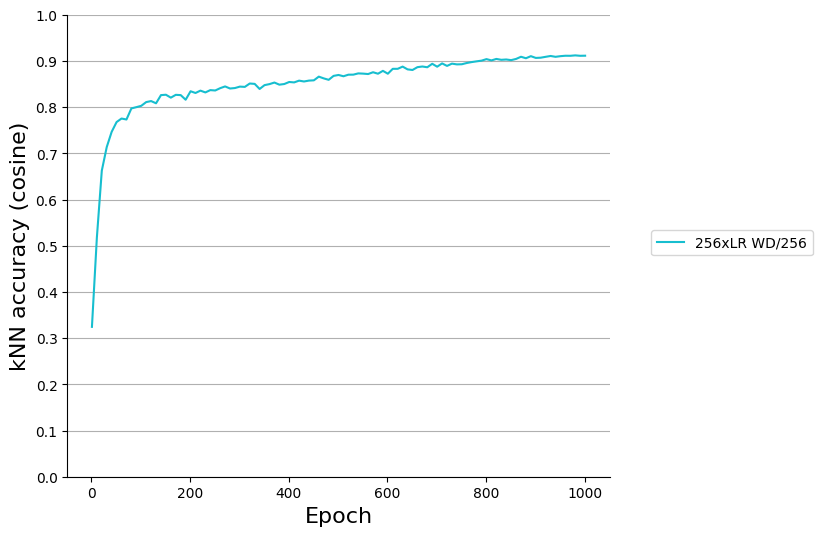

In [4]:
from tbparse import SummaryReader
from matplotlib import pyplot as plt
import matplotlib as mpl
import os
import numpy as np
import torch

def plot_accuracies(
        paths,
        fig = None,
        ax = None
):  
    if fig is None or ax is None:
        fig = plt.figure(figsize=(7, 6))
        gs = fig.add_gridspec(1,1, hspace=0)
        ax = gs.subplots()

    for name, (color, npy_file_path) in paths.items():
        npy_file_folder = npy_file_path.replace("/embed_history.npy", "")
        log_dir = None
        for path in os.listdir(npy_file_folder):
                if "events" in path:
                        log_dir = npy_file_folder + "/" + path
        reader = SummaryReader(log_dir)
        df = reader.scalars
        acc = torch.tensor(list(df[df.tag == "kNN accuracy (cosine)"].value))
        x = 10 * torch.arange(0, len(acc)) +1
        
        # if "Unbal" in name:
        #     x = x // 3.3
        ax.plot(x, acc, label=name, c=color)

    ax.set_xlabel("Epoch",  fontdict={"size":16})
    ax.set_ylabel("kNN accuracy (cosine)",  fontdict={"size":16})
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    return fig, ax

fig, ax = plot_accuracies(paths)
ax.grid(visible=True, axis="y")
low_acc = 0
high_acc = 1
ax.set_ylim(low_acc, high_acc)
# ax.set_xlim(-5, 100)
ax.set_yticks(np.arange(low_acc, high_acc+0.1, 0.1))
# ax.legend(loc="center right")
fig.legend(loc="center right", bbox_to_anchor=(1.2, 0.5))

Text(0.5, 0.98, 'Training Loss Comparison')

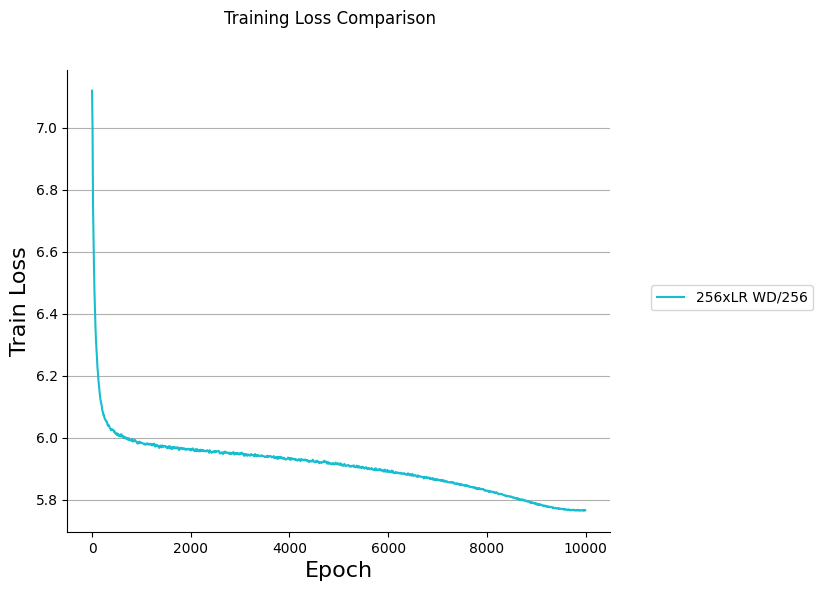

In [5]:
from tbparse import SummaryReader
from matplotlib import pyplot as plt
import matplotlib as mpl
import os
import numpy as np
import torch

def plot_loss(
        paths,
        fig = None,
        ax = None
):  
    if fig is None or ax is None:
        fig = plt.figure(figsize=(7, 6))
        gs = fig.add_gridspec(1,1, hspace=0)
        ax = gs.subplots()

    for name, (color, npy_file_path) in paths.items():
        npy_file_folder = npy_file_path.replace("/embed_history.npy", "")
        log_dir = None
        for path in os.listdir(npy_file_folder):
                if "events" in path:
                        log_dir = npy_file_folder + "/" + path
        reader = SummaryReader(log_dir)
        df = reader.scalars
        loss = torch.tensor(list(df[df.tag == "loss"].value))
        x = 10 * torch.arange(0, len(loss)) +1
        
        if "Unbal" in name:
            x = x // 3.3
        ax.plot(x, loss, label=name, c=color)

    ax.set_xlabel("Epoch",  fontdict={"size":16})
    ax.set_ylabel("Train Loss",  fontdict={"size":16})
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    return fig, ax


# cmap = mpl.colormaps['tab20']
# paths = {
#     # "2xLR WD/2": (cmap(16), "logs/reruns/lr_weight_decay_rebalance/l2/version_0/embed_history.npy"),
#     # "256xLR WD/256": (cmap(9), "logs/reruns/rebalance_adjusted_head/l2/version_2/embed_history.npy"),
#     # "1024xLR WD/1024": (cmap(10), "logs/reruns/rebalance_adjusted_head/l2/version_3/embed_history.npy"),
#     # "2048xLR WD/2048": (cmap(11), "logs/reruns/rebalance_adjusted_head/l2/version_4/embed_history.npy"),
#     # "4096xLR WD/4096": (cmap(12), "logs/reruns/rebalance_adjusted_head/l2/version_5/embed_history.npy"),
#     # "8192xLR WD/8192": (cmap(13), "logs/reruns/rebalance_adjusted_head/l2/version_6/embed_history.npy"),
#     "32768xLR WD/32768": (cmap(15), "logs/reruns/rebalance_adjusted_head/l2/version_8/embed_history.npy"),
#     "16384xLR WD/16384": (cmap(14), "logs/reruns/rebalance_adjusted_head/l2/version_7/embed_history.npy"),
#     "128xLR WD/128": (cmap(8), "logs/reruns/rebalance_adjusted_head/l2/version_1/embed_history.npy"),
#     "32xLR WD/32": (cmap(7), "logs/reruns/rebalance_adjusted_head/l2/version_0/embed_history.npy"),
#     # "8xLR WD/8": (cmap(18), "logs/reruns/lr_weight_decay_rebalance/l2/version_2/embed_history.npy"),
#     # "4xLR WD/4": (cmap(17), "logs/reruns/lr_weight_decay_rebalance/l2/version_1/embed_history.npy"),
#     "SimCLR baseline": ("black", "logs/reruns/SimCLR/simclr/embed_history.npy"),
#     "LR/2 2xWD": (cmap(0), "logs/reruns/rebalance_lower_lr_wd/l2/version_0/embed_history.npy"),
#     # "LR/4 4xWD": (cmap(1), "logs/reruns/rebalance_lower_lr_wd/l2/version_1/embed_history.npy"),
#     # "LR/8 8xWD": (cmap(2), "logs/reruns/rebalance_lower_lr_wd/l2/version_2/embed_history.npy"),
#     "LR/32 32xWD": (cmap(3), "logs/reruns/rebalance_lower_lr_wd/l2/version_3/embed_history.npy"),
#     "LR/64 64xWD": (cmap(4), "logs/reruns/rebalance_lower_lr_wd/l2/version_4/embed_history.npy"),
#     "LR/128 128xWD": (cmap(5), "logs/reruns/rebalance_lower_lr_wd/l2/version_5/embed_history.npy"),
#     "LR/256 256xWD": (cmap(6), "logs/reruns/rebalance_lower_lr_wd/l2/version_6/embed_history.npy"),
# }



fig, ax = plot_loss(paths)
ax.grid(visible=True, axis="y")
# ax.set_ylim(0,1)
# ax.set_xlim(-5, 100)
# ax.set_yticks(np.arange(0, 1.1, 0.1))
# ax.legend(loc="center right")
fig.legend(loc="center right", bbox_to_anchor=(1.2, 0.5))
fig.suptitle("Training Loss Comparison")


In [6]:
# npy_file_folder = paths["SimCLR"][1].replace("/embed_history.npy", "")

# log_dir = None
# for path in os.listdir(npy_file_folder):
#     if "events" in path:
#         log_dir = npy_file_folder + "/" + path
# reader = SummaryReader(log_dir)
# df = reader.scalars
# lr_schedule = torch.tensor(list(df[df.tag == "schedule"].value))

# fig, ax = plt.subplots(figsize=(7,6))
# ax.plot(lr_schedule, color="black", label="SimCLR")
# ax.set_title("Learning Rate Schedule over Training")
# ax.set_xlabel("Epoch", fontdict={"size":16})
# ax.set_ylabel("Learning Rate", fontdict={"size":16})
# # ax.legend()
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)

(<Figure size 1000x600 with 1 Axes>,
 <Axes: xlabel='Epoch', ylabel='Effective LR'>)

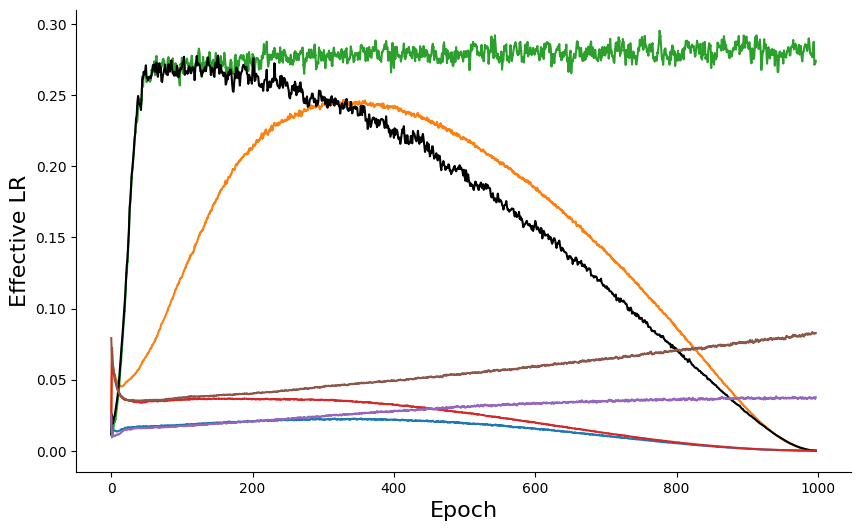

In [8]:
from tbparse import SummaryReader
from matplotlib import pyplot as plt
import matplotlib as mpl
import os
import numpy as np
import torch


def interweave(a,b):
    c = np.empty((a.shape[0] + b.shape[0], a.shape[1]), dtype=a.dtype)
    c[0::2] = a
    c[1::2] = b
    return c

def _plot_effective_lr2(
        ax,
        npy_file_path,
        color=None,
        variant_name=None,
        from_step = 0,
        up_to_step = 1000,
        only_mean=True,
        plot_lr_schedule=True,
        ):
    with open(npy_file_path, "rb") as f:
        embed_histories = np.load(f, allow_pickle=True).item()
    norm_hist = embed_histories["train_norm_history"][:-1]
    embed_norms_tensor = torch.tensor(norm_hist)[from_step:up_to_step]
    embed_norms_tensor = interweave(embed_norms_tensor.numpy()[:,0], embed_norms_tensor.numpy()[:,1])

    npy_file_folder = npy_file_path.replace("/embed_history.npy", "")
    log_dir = None
    for path in os.listdir(npy_file_folder):
        if "events" in path:
            log_dir = npy_file_folder + "/" + path

    reader = SummaryReader(log_dir)
    df = reader.scalars
    lr_schedule = torch.tensor(list(df[df.tag == "schedule"].value)).repeat_interleave(2)
    if lr_schedule.shape[0] == 0:
        print(variant_name, "no lr schedule found, this might be due to no schedule being used or the setting for saving the schedule being turned of, the following workaround assumes that infact no schedule was used during training")
        lr_schedule = torch.ones(len(embed_norms_tensor)) * df[df.tag == "lr-SGD"].iloc[0].value
    lr_schedule = lr_schedule[from_step:up_to_step]
    if len(lr_schedule) > len(embed_norms_tensor):
        lr_schedule = lr_schedule[:len(embed_norms_tensor)]
    
    effective_lr = lr_schedule.reshape(-1, 1)/embed_norms_tensor
    mean = effective_lr.mean(dim=-1)
    std = effective_lr.std(dim=-1)

    x = torch.arange(0,len(mean)//2).repeat_interleave(2)
    ax.plot(x , mean, label=variant_name, color=color)
    if not only_mean:
        ax.fill_between(x, mean+std, mean-std, color=color, alpha=.15, label="std")

    if plot_lr_schedule:
        ax.plot(x, lr_schedule, color=color, alpha=0.5)
    # plt.plot(effective_lr.min(dim=-1).values, label="max effective LR")
    # plt.plot(effective_lr.max(dim=-1).values, label="min effective LR")
    ax.set_ylabel("Effective LR", fontdict={"size":16})
    ax.set_xlabel("Epoch", fontdict={"size":16})
    # ax.set_title("Effective LR")


def plot_effective_lrs2(
        paths,
        from_step = 0,
        up_to_step = -1,
        only_mean = True,
        plot_lr_schedule=False,
        fig = None,
        ax = None
        ):
    if fig is None or ax is None:
        fig = plt.figure(figsize=(10, 6))
        gs = fig.add_gridspec(1,1, hspace=0)
        ax = gs.subplots()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
    
    for variant_name, variant in paths.items():
        if type(variant) is tuple:
            variant_color, variant_path = variant
        else:
            variant_path = variant
            variant_color = None

        _plot_effective_lr2(
            ax,
            npy_file_path = variant_path,
            variant_name=variant_name,
            color=variant_color,
            from_step = from_step,
            up_to_step = up_to_step,
            only_mean=only_mean,
            plot_lr_schedule=plot_lr_schedule
            )
    
    return fig, ax


cmap = mpl.colormaps['tab20']

# paths = {
#     "SimCLR baseline": ("black", "logs/reruns/lr_weight_decay_rebalance/l2/simclr/embed_history.npy"),
#     # "2xLR WD/2": (cmap(0), "logs/reruns/lr_weight_decay_rebalance/l2/version_0/embed_history.npy"),
#     "4xLR WD/4": (cmap(1), "logs/reruns/lr_weight_decay_rebalance/l2/version_1/embed_history.npy"),
#     "8xLR WD/8": (cmap(2), "logs/reruns/lr_weight_decay_rebalance/l2/version_2/embed_history.npy"),
#     "32xLR WD/32": (cmap(3), "logs/reruns/lr_weight_decay_rebalance/l2/version_3/embed_history.npy"),
#     "128xLR WD/128": (cmap(4), "logs/reruns/lr_weight_decay_rebalance/l2/version_4/embed_history.npy"),
#     "256xLR WD/256": (cmap(5), "logs/reruns/rebalance_adjusted_head/l2/version_2/embed_history.npy"),
# }
# paths = {
#     "256/LR Decay*256": (cmap(0), "logs/reruns/rebalance_lower_lr_wd/l2/version_6/embed_history.npy"),
#     "128/LR Decay*128": (cmap(1), "logs/reruns/rebalance_lower_lr_wd/l2/version_5/embed_history.npy"),
#     "64/LR Decay*64": (cmap(2), "logs/reruns/rebalance_lower_lr_wd/l2/version_4/embed_history.npy"),
#     # "32/LR Decay*32": (cmap(3), "logs/reruns/rebalance_lower_lr_wd/l2/version_3/embed_history.npy"),
#     # "8/LR Decay*8": (cmap(4), "logs/reruns/rebalance_lower_lr_wd/l2/version_2/embed_history.npy"),
#     "4/LR Decay*4": (cmap(5), "logs/reruns/rebalance_lower_lr_wd/l2/version_1/embed_history.npy"),
#     "2/LR Decay*2": (cmap(6), "logs/reruns/rebalance_lower_lr_wd/l2/version_0/embed_history.npy"),
#     "SimCLR baseline": ("black", "logs/reruns/lr_weight_decay_rebalance/l2/simclr/embed_history.npy"),
# }

# paths = {
#     "SimCLR baseline": ("black", "logs/reruns/lr_weight_decay_rebalance/l2/simclr/embed_history.npy"),
#     # "2xLR WD/2": (cmap(16), "logs/reruns/lr_weight_decay_rebalance/l2/version_0/embed_history.npy"),
#     "4xLR WD/4": (cmap(17), "logs/reruns/lr_weight_decay_rebalance/l2/version_1/embed_history.npy"),
#     "8xLR WD/8": (cmap(18), "logs/reruns/lr_weight_decay_rebalance/l2/version_2/embed_history.npy"),
#     "32xLR WD/32": (cmap(7), "logs/reruns/rebalance_adjusted_head/l2/version_0/embed_history.npy"),
#     "128xLR WD/128": (cmap(8), "logs/reruns/rebalance_adjusted_head/l2/version_1/embed_history.npy"),
#     # "256xLR WD/256": (cmap(9), "logs/reruns/rebalance_adjusted_head/l2/version_2/embed_history.npy"),
#     # "1024xLR WD/1024": (cmap(10), "logs/reruns/rebalance_adjusted_head/l2/version_3/embed_history.npy"),
#     # "2048xLR WD/2048": (cmap(11), "logs/reruns/rebalance_adjusted_head/l2/version_4/embed_history.npy"),
#     # "4096xLR WD/4096": (cmap(12), "logs/reruns/rebalance_adjusted_head/l2/version_5/embed_history.npy"),
#     # "8192xLR WD/8192": (cmap(13), "logs/reruns/rebalance_adjusted_head/l2/version_6/embed_history.npy"),
#     "16384xLR WD/16384": (cmap(14), "logs/reruns/rebalance_adjusted_head/l2/version_7/embed_history.npy"),
#     "32768xLR WD/32768": (cmap(15), "logs/reruns/rebalance_adjusted_head/l2/version_8/embed_history.npy"),
# }
# paths = {
#     "SimCLR baseline": ("black", "logs/reruns/SimCLR/simclr/embed_history.npy"),
#     "LR/2 2xWD": (cmap(0), "logs/reruns/rebalance_lower_lr_wd/l2/version_0/embed_history.npy"),
#     "LR/4 4xWD": (cmap(1), "logs/reruns/rebalance_lower_lr_wd/l2/version_1/embed_history.npy"),
#     "LR/8 8xWD": (cmap(2), "logs/reruns/rebalance_lower_lr_wd/l2/version_2/embed_history.npy"),
#     "LR/32 32xWD": (cmap(3), "logs/reruns/rebalance_lower_lr_wd/l2/version_3/embed_history.npy"),
#     "LR/64 64xWD": (cmap(4), "logs/reruns/rebalance_lower_lr_wd/l2/version_4/embed_history.npy"),
#     "LR/128 128xWD": (cmap(5), "logs/reruns/rebalance_lower_lr_wd/l2/version_5/embed_history.npy"),
#     "LR/256 256xWD": (cmap(6), "logs/reruns/rebalance_lower_lr_wd/l2/version_6/embed_history.npy"),
# }

# paths = {
#     "SimCLR baseline": ("black", "logs/reruns/SimCLR/simclr/embed_history.npy"),
#     "256xLR WD/256": (cmap(9), "logs/reruns/rebalance_adjusted_head/l2/version_2/embed_history.npy"),
#     "1024xLR WD/1024": (cmap(10), "logs/reruns/rebalance_adjusted_head/l2/version_3/embed_history.npy"),
#     "16384xLR WD/16384": (cmap(14), "logs/reruns/rebalance_adjusted_head/l2/version_7/embed_history.npy"),
#     "32768xLR WD/32768": (cmap(15), "logs/reruns/rebalance_adjusted_head/l2/version_8/embed_history.npy"),

#     "16xLR": (cmap(16), "logs/reruns/lr_ablation/version_0/embed_history.npy"),
#     "32xLR": (cmap(16), "logs/reruns/lr_ablation/version_1/embed_history.npy"),
#     "64xLR": (cmap(16), "logs/reruns/lr_ablation/version_2/embed_history.npy"),
#     # "128xLR": (cmap(16), "logs/reruns/lr_ablation/version_3/embed_history.npy"),
# }


# paths = {
#     "SimCLR baseline": ("black", "logs/reruns/SimCLR/version_0/embed_history.npy"),
#     "256xLR Decay/256": (cmap(1), "logs/reruns/rebalance_adjusted_head/version_10/embed_history.npy"),
# }
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
plot_effective_lrs2(paths, plot_lr_schedule=False, only_mean=True)
# ax.legend(loc='upper right')

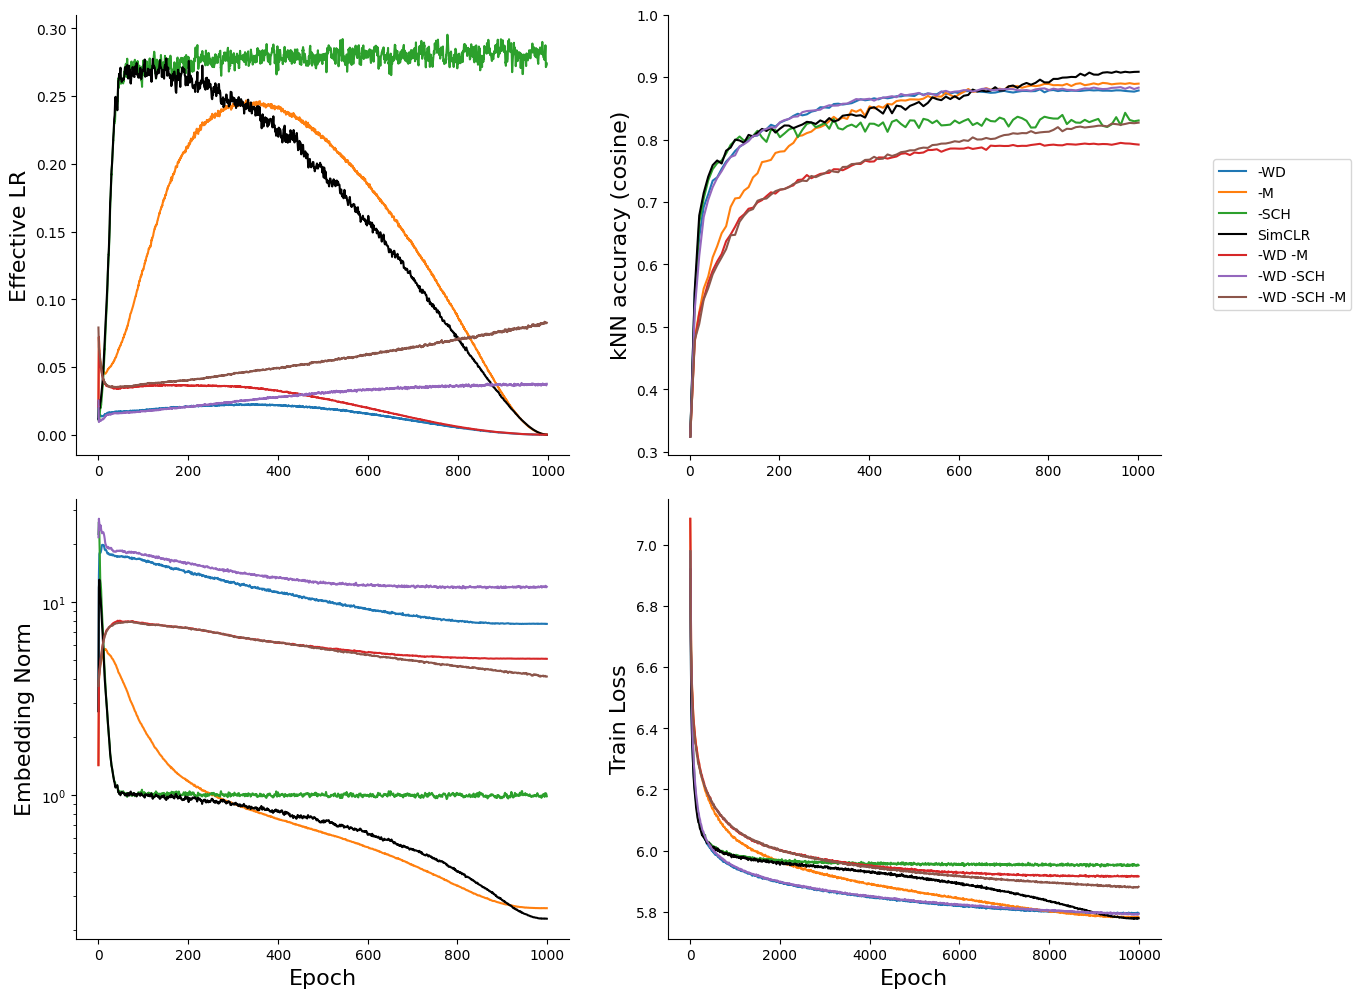

In [9]:
fig = plt.figure(figsize=(14, 12))
gs = fig.add_gridspec(2,2, hspace=0.1, wspace=0.2)
ax = gs.subplots()


plot_effective_lrs2(paths, plot_lr_schedule=False, only_mean=True, fig=fig, ax=ax[0,0])
plot_accuracies(paths, fig=fig, ax=ax[0,1])
from_epoch = 0
up_to_epoch = 1000
_, ax2 = plot_histories(paths, metric_name="norm", from_epoch=from_epoch, up_to_epoch=up_to_epoch, only_mean=True, fig=fig, ax=ax[1,0])
ax2.set_yscale("log")
plot_loss(paths, fig=fig, ax=ax[1,1])
ax[0,1].legend(loc="center right", bbox_to_anchor=(1.4, 0.5))
ax[0,0].set_xlabel("", fontdict={"size":16})
ax[0,1].set_xlabel("", fontdict={"size":16})
ax[0,1].set_yticks(np.arange(0.3, 1.1, 0.1))

for ax_i in ax.flatten():
    ax_i.spines['right'].set_visible(False)
    ax_i.spines['top'].set_visible(False)

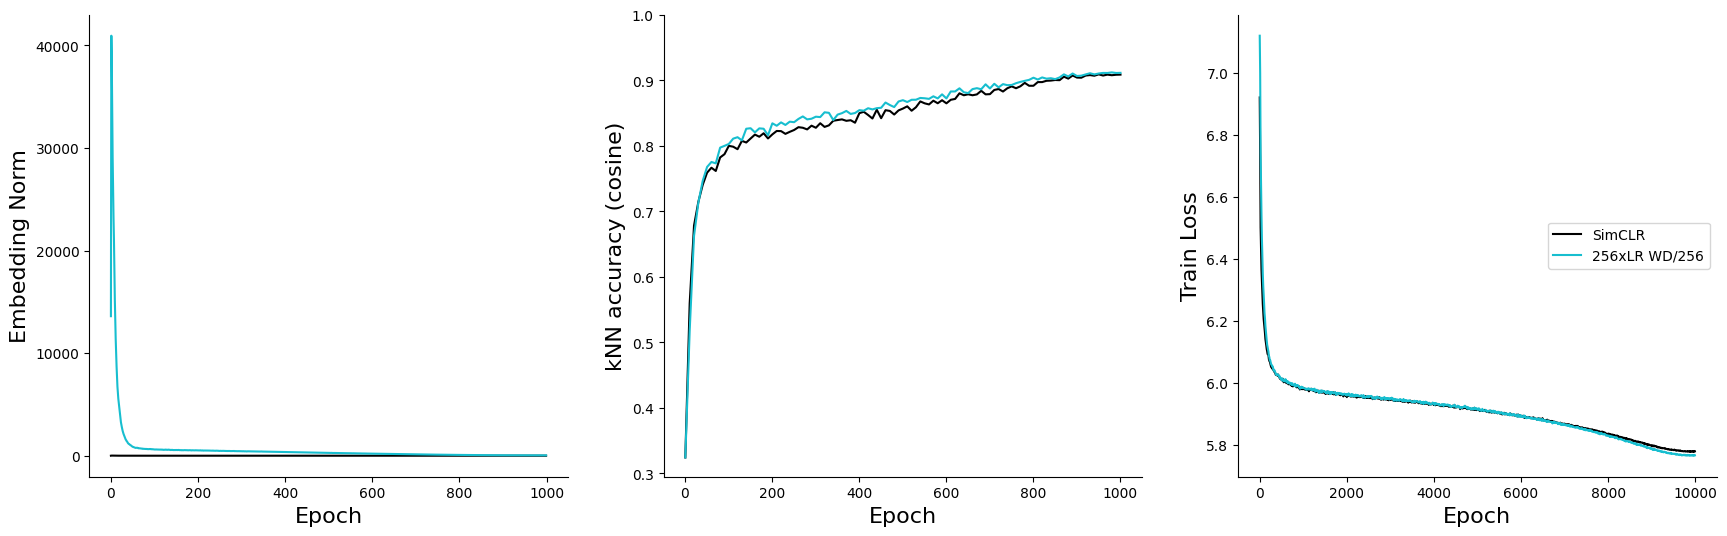

In [10]:
fig = plt.figure(figsize=(21, 6))
gs = fig.add_gridspec(1,3, hspace=0.1, wspace=0.2)
ax = gs.subplots()


# plot_effective_lrs2(paths, plot_lr_schedule=False, only_mean=True, fig=fig, ax=ax[0,0])
plot_accuracies(paths, fig=fig, ax=ax[1])
from_epoch = 0
up_to_epoch = 1000
_, ax2 = plot_histories(paths, metric_name="norm", from_epoch=from_epoch, up_to_epoch=up_to_epoch, only_mean=True, fig=fig, ax=ax[0])
# ax2.set_yscale("log")
plot_loss(paths, fig=fig, ax=ax[2])
ax[2].legend(loc="center right", bbox_to_anchor=(1, 0.5))
# ax[0].set_xlabel("", fontdict={"size":16})
# ax[1].set_xlabel("", fontdict={"size":16})
ax[1].set_yticks(np.arange(0.3, 1.1, 0.1))

for ax_i in ax.flatten():
    ax_i.spines['right'].set_visible(False)
    ax_i.spines['top'].set_visible(False)

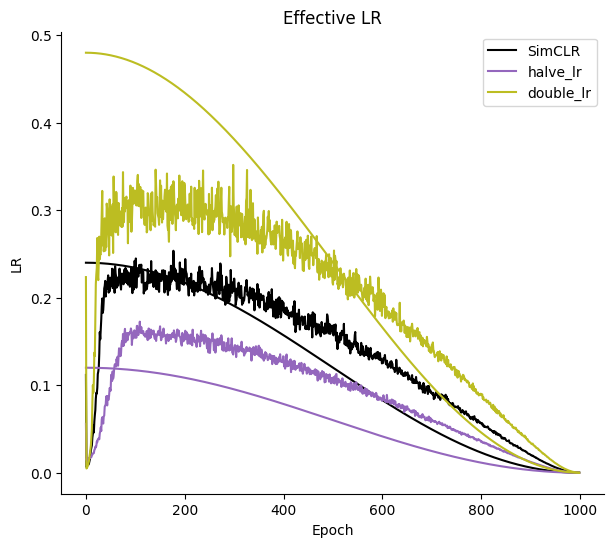

In [ ]:
from tbparse import SummaryReader
from matplotlib import pyplot as plt
import os
import numpy as np
import torch



def plot_effective_lr(npy_file_path, up_to_step = 1000, plot_lr_schedule=True):
    
    fig = ax.figure(figsize=(7, 6))
    gs = fig.add_gridspec(1,1, hspace=0)
    ax = gs.subplots()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    _plot_effective_lr(ax, npy_file_path, up_to_step=up_to_step, plot_lr_schedule=plot_lr_schedule)
    plt.show()

def _plot_effective_lr(
        ax,
        npy_file_path,
        color=None,
        variant_name=None,
        from_step = 0,
        up_to_step = 1000,
        only_mean=True,
        plot_lr_schedule=True
        ):
    with open(npy_file_path, "rb") as f:
        embed_histories = np.load(f, allow_pickle=True).item()
    norm_hist = embed_histories["norm_history"][:-1]
    embed_norms_tensor = torch.tensor(norm_hist)[from_step:up_to_step]

    npy_file_folder = npy_file_path.replace("/embed_history.npy", "")
    log_dir = None
    for path in os.listdir(npy_file_folder):
        if "events" in path:
            log_dir = npy_file_folder + "/" + path

    reader = SummaryReader(log_dir)
    df = reader.scalars
    lr_schedule = torch.tensor(list(df[df.tag == "Cosine_Annealing_with_Warmup"].value))
    if lr_schedule.shape[0] == 0:
        print(variant_name, "no lr schedule found, this might be due to no schedule being used or the setting for saving the schedule being turned of, the following workaround assumes that infact no schedule was used during training")
        lr_schedule = torch.ones(len(embed_norms_tensor)) * df[df.tag == "lr-SGD"].iloc[0].value
    lr_schedule = lr_schedule[from_step:up_to_step]
    if len(lr_schedule) > len(embed_norms_tensor):
        lr_schedule = lr_schedule[:len(embed_norms_tensor)]

    effective_lr = lr_schedule.reshape(-1, 1)/embed_norms_tensor
    mean = effective_lr.mean(dim=-1)
    std = effective_lr.std(dim=-1)


    ax.plot(mean, label=variant_name, color=color)
    if not only_mean:
        ax.fill_between(range(len(embed_norms_tensor)), mean+std, mean-std, color=color, alpha=.15, label="std")

    if plot_lr_schedule:
        ax.plot(lr_schedule, color=color)
    # plt.plot(effective_lr.min(dim=-1).values, label="max effective LR")
    # plt.plot(effective_lr.max(dim=-1).values, label="min effective LR")
    ax.set_ylabel("LR")
    ax.set_xlabel("Epoch")
    ax.legend()
    ax.set_title("Effective LR")


def plot_effective_lrs(
        paths,
        from_step = 0,
        up_to_step = -1,
        only_mean = True,
        plot_lr_schedule=False
        ):
    fig = plt.figure(figsize=(7, 6))
    gs = fig.add_gridspec(1,1, hspace=0)
    ax = gs.subplots()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    for variant_name, variant in paths.items():
        if type(variant) is tuple:
            variant_color, variant_path = variant
        else:
            variant_path = variant
            variant_color = None

        _plot_effective_lr(
            ax,
            npy_file_path = variant_path,
            variant_name=variant_name,
            color=variant_color,
            from_step = from_step,
            up_to_step = up_to_step,
            only_mean=only_mean,
            plot_lr_schedule=plot_lr_schedule
            )
    
    ax.legend()
    fig.show()


cmap = mpl.colormaps['tab10']
paths = dict(
    SimCLR = ("black", "logs/No_schedule-_No_decay-1000/l2/SimCLR-1000/embed_history.npy"),
    # no_decay = (cmap(1), "logs/No_schedule-_No_decay-1000/l2/no_decay/embed_history.npy"),
    # no_decay_no_momentum = (cmap(2), "logs/No_schedule-_No_decay-1000/l2/no_decay-no_momentum/embed_history.npy"),
    # no_momentum = (cmap(9), "logs/No_schedule-_No_decay-1000/l2/no_momentum/embed_history.npy"),
    # no_schedule = (cmap(4), "logs/No_schedule-_No_decay-1000/l2/no_schedule/embed_history.npy"),
    # no_decay_no_schedule = (cmap(3), "logs/No_schedule-_No_decay-1000/l2/no_decay-no_schedule/embed_history.npy"),
    # mono = (cmap(5), "logs/Point_tracking-1000/mono/version_2/embed_history.npy"),
    # gradscale = (cmap(6), "logs/Point_tracking-1000/gradscale/version_46/embed_history.npy"),
    # inv_gradscale = (cmap(7), "logs/Point_tracking-1000/inv_gradscale/version_3/embed_history.npy"),
    # no_decay_double_lr = (cmap(8), "logs/No_schedule-_No_decay-1000/no_decay_double_lr/version_1/embed_history.npy"),
    # double_decay_double_lr = (cmap(10), "logs/No_schedule-_No_decay-1000/double_decay_double_lr/version_0/embed_history.npy")
    halve_lr = (cmap(4), "logs/No_schedule-_No_decay-1000/l2/version_2/embed_history.npy"),
    double_lr = (cmap(8), "logs/No_schedule-_No_decay-1000/double_lr/version_1/embed_history.npy"),
)

plot_effective_lrs(paths, plot_lr_schedule=True)

In [1]:
%cd ..
%load_ext autoreload
%autoreload 2
%env CUDA_VISIBLE_DEVICES=2
from utils.plotting_utils import *

/gpfs01/berens/user/jdoehl/GitHub/sssl
env: CUDA_VISIBLE_DEVICES=2


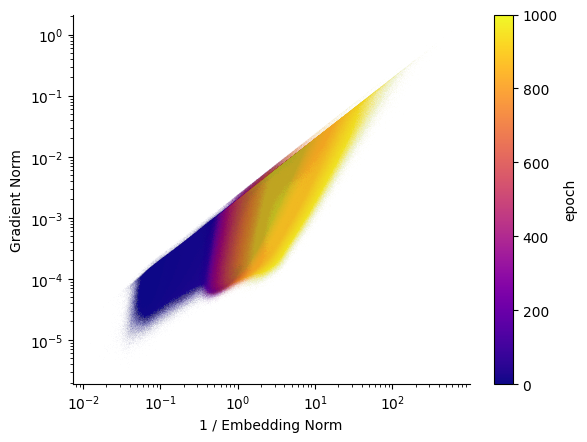

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib as mpl

def interweave(a,b):
    c = np.empty((a.shape[0] + b.shape[0], a.shape[1]), dtype=a.dtype)
    c[0::2] = a
    c[1::2] = b
    return c

def plt_gradient_norm_embedding_norm(embed_histories, idx_count, start_from_epoch, log_scale=False, take_mean = False):
    fig, ax = plt.subplots()

    grad_norm_history = embed_histories["grad_norm_history"]
    train_norm_history = embed_histories["train_norm_history"]
    sampled_points = np.random.choice(np.arange(0,50000), size=idx_count, replace=False)

    y = interweave(grad_norm_history[:,0], grad_norm_history[:,1])[2*start_from_epoch:, sampled_points]
    x = 1/interweave(train_norm_history[:,0], train_norm_history[:,1])[2*start_from_epoch:, sampled_points]
    

    if take_mean:
        y = y.mean(1)
        x = x.mean(1)
        # interweaving view 1 and view 2 norm, because during training there are always 2 views
        

    epoch_n = grad_norm_history.shape[0]
    # repeat 2 for 2 views
    color = np.repeat(np.linspace(start_from_epoch, epoch_n, int(len(x)/2)),2)
    if not take_mean:
        color = color.repeat(idx_count)
    cmap = "plasma"

    scatter = ax.scatter(x, y, c=color, cmap=cmap, alpha=1, edgecolors='none', s=0.01)
    plt.colorbar(scatter, label="epoch", alpha=1)
    ax.set_ylabel("Gradient Norm")
    ax.set_xlabel("1 / Embedding Norm")
    if log_scale:
        ax.set_xscale("log")
        ax.set_yscale("log")
    if take_mean:
        ax.set_title(f"Mean across {idx_count} datapoints")
    # else:
    #     ax.set_title(f"{idx_count} randomly sampled datapoints")
    # plt.xlim(0,10)
    # plt.ylim(0,15000)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.show()


variant = dict(
    SimCLR = "logs/reruns/SimCLR/version_1/embed_history.npy",

)["SimCLR"]


with open(variant, "rb") as f:
    embed_histories = np.load(f, allow_pickle=True).item()


plt_gradient_norm_embedding_norm(embed_histories, idx_count=50000, start_from_epoch=0, log_scale=True)

Text(0.5, 1.0, '-WD')

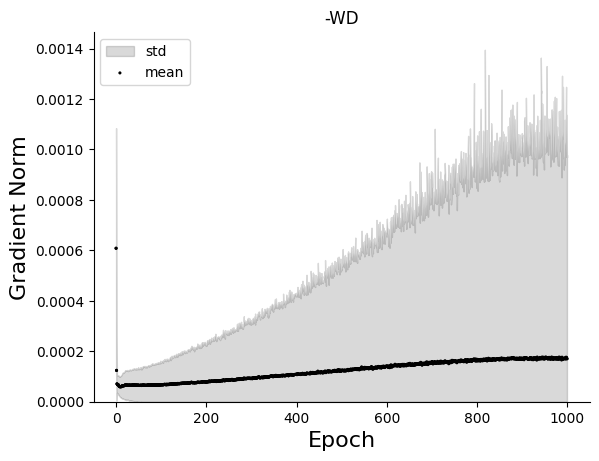

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib as mpl

def interweave(a,b):
    c = np.empty((a.shape[0] + b.shape[0], a.shape[1]), dtype=a.dtype)
    c[0::2] = a
    c[1::2] = b
    return c

def plt_grad_norm(embed_histories, log_scale=False, correct_for_embed_norm = False, use_color=True, show_std=True):
    fig, ax = plt.subplots()

    grad_norm_history = embed_histories["grad_norm_history"]
    train_norm_history = embed_histories["train_norm_history"]
    
    y = interweave(grad_norm_history[:,0], grad_norm_history[:,1])
    embed_norm = interweave(train_norm_history[:,0], train_norm_history[:,1])

    if correct_for_embed_norm:
        y = y * embed_norm

    mean = y.mean(1)
    std = y.std(1)

    x = np.arange(len(y)//2).repeat(2)
    epoch_n = grad_norm_history.shape[0]
    # repeat 2 for 2 views
    color = np.repeat(np.linspace(0, epoch_n, int(len(x)/2)),2)
    cmap = "plasma"
    
    if show_std:
        ax.fill_between(x, mean+std - (mean-std < 0) *(mean-std), (mean-std > 0) *(mean-std), color="black", alpha=.15, label="std")
    
    if use_color:
        scatter = ax.scatter(x, mean, c=color, cmap=cmap, alpha=1, edgecolors='none', s=5, label="mean")
    else:
        scatter = ax.scatter(x, mean, color="black", alpha=1, edgecolors='none', s=5, label="mean")

    cb = plt.colorbar(scatter, label="epoch", alpha=1)
    cb.remove()
    ax.legend()
    if correct_for_embed_norm:
        ax.set_ylabel("Gradient Norm * Embedding Norm", fontdict={"size":16})
    else:
        ax.set_ylabel("Gradient Norm", fontdict={"size":16})
        
    ax.set_xlabel("Epoch", fontdict={"size":16})
    if log_scale:
        ax.set_yscale("log")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_ylim(bottom=0)
    return fig, ax





cmap = mpl.colormaps['tab10']
paths = {
    "-WD" : (cmap(0), "logs/reruns/non_mapping_variants/no_decay/version_0/embed_history.npy"),
    "-M" : (cmap(1), "logs/reruns/non_mapping_variants/no_momentum/version_0/embed_history.npy"),
    "-SCH" : (cmap(2), "logs/reruns/non_mapping_variants/no_schedule/version_0/embed_history.npy"),
    "SimCLR" : ("black", "logs/reruns/SimCLR/version_0/embed_history.npy"),
    "-WD -M" : (cmap(3), "logs/reruns/non_mapping_variants/no_decay_no_momentum/version_1/embed_history.npy"),
    "-WD -SCH" : (cmap(4), "logs/reruns/no_decay_no_schedule/version_0/embed_history.npy"),
    "-WD -SCH -M" : (cmap(5), "logs/reruns/no_decay_no_schedule_no_momentum/version_0/embed_history.npy"),
}

key = "-WD"
variant = paths[key][1]


with open(variant, "rb") as f:
    embed_histories = np.load(f, allow_pickle=True).item()
    
fig, ax = plt_grad_norm(embed_histories, correct_for_embed_norm=False, use_color=False)
ax.set_title(key)